<a href="https://colab.research.google.com/github/raegar/MachineLearningSolutions/blob/main/TensorflowCtoFSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dependencies and only log error messages

In [ ]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np


Set up training data

Input (celcius_q = Features) <br/>
Outputs (fahrenheit_a = Labels) <br/>
Pair of input and output = Training Example

In [ ]:
celcius_q = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)
for i,c in enumerate(celcius_q):
  print("{} degrees Celcius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celcius = -40.0 degrees Fahrenheit
-10.0 degrees Celcius = 14.0 degrees Fahrenheit
0.0 degrees Celcius = 32.0 degrees Fahrenheit
8.0 degrees Celcius = 46.0 degrees Fahrenheit
15.0 degrees Celcius = 59.0 degrees Fahrenheit
22.0 degrees Celcius = 72.0 degrees Fahrenheit
38.0 degrees Celcius = 100.0 degrees Fahrenheit


Create model

keras.layers.Dense creates a new single Dense layer that consists of 1 neuron (unit) and has 1 input array (shape) to work with.

Then create the model with the single layer

In [ ]:
layer0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer0])

Compile the model with a Loss and an Optimizer


loss accounts for variability in the outcomes and optimiser is how agressively the algorithm will try to find the correct outcome. Any value from 0.001 to 0.1 would be appropriate


In [ ]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

Train the model by calling the fit method

One epoch is a full iteration of the samples provided (7 * 500 = 3500 training examples)

In [ ]:
training = model.fit(celcius_q, fahrenheit_a, epochs=1000, verbose=False)
print ("finished training the model")

finished training the model


Display training statistics. High loss is a poor result.

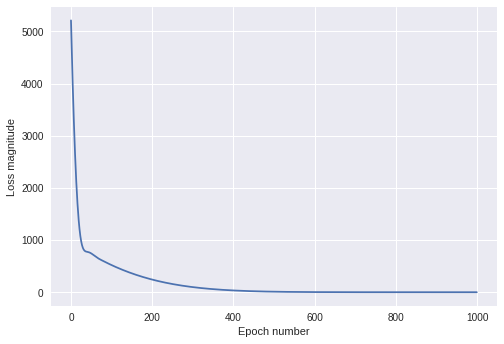

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch number')
plt.ylabel("Loss magnitude")
plt.plot(training.history['loss'])

Use the model to predict values

In [ ]:
print("100 C = {} F ".format(model.predict([100.00])))

100 C = [[211.74405]] F 


In [ ]:
print("9 C = {} F ".format(model.predict([9.00])))

9 C = [[48.113777]] F 


Looking at the layer weights [weight], [bias]

In [ ]:
print("These are the layer variables: {}".format(layer0.get_weights()))

These are the layer variables: [array([[1.7981348]], dtype=float32), array([31.930567], dtype=float32)]


**By now you should know what the following terms are:**

Feature: The input(s) to our model

Examples: An input/output pair used for training

Labels: The output of the model

Layer: A collection of nodes connected together within a neural network.

Model: The representation of your neural network

Dense and Fully Connected (FC): Each node in one layer is connected to each node in the previous layer.

Weights and biases: The internal variables of model

Loss: The discrepancy between the desired output and the actual output

MSE: Mean squared error, a type of loss function that counts a small number of large discrepancies as worse than
a large number of small ones.

Gradient Descent: An algorithm the internal variables a bit at a time to gradually reduce the loss function.

Optimizer: A specific implementation of the gradient descent algorithm. (There are many algorithms for this. In this
course we will only use the “Adam” Optimizer, which stands for ADAptive with Momentum. It is considered the
best-practice optimizer.)

Learning rate: The “step size” for loss improvement during gradient descent.

Batch: The set of examples used during training of the neural network

Epoch: A full pass over the entire training dataset

Forward pass: The computation of output values from input

Backward pass (backpropagation): The calculation of internal variable adjustments according to the optimizer algorithm, starting from the output layer and working back through each layer to the input.